## Importing libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Understanding data

#### Loading Dataset

In [85]:
df = pd.read_csv(r"C:\Users\ASM9015\Downloads\Cars Datasets 2025.csv", encoding="cp1252")
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


#### Getting info on dataset and analyzing

In [86]:
print("Dataframe's shape: ", df.shape,'\n')
print(df.info(),'\n')
print(df.describe(),'\n')
print(df.columns,'\n')

df.columns = df.columns.str.replace(' ', '_')  
print(df.columns,'\n')

Dataframe's shape:  (1218, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB
None 

       Company Names       Cars Names Engines CC/Battery Capacity HorsePower  \
count          

#### Cleaning data

In [87]:
def extract_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

In [88]:
def clean_price(value):
    value = str(value).replace("$", "").replace(",", "").strip()
    if "–" in value or "-" in value:
        parts = value.replace("–", "-").split("-")
        nums = [float(p) for p in parts if p.strip().isdigit()]
        if len(nums) == 2:
            return sum(nums) / 2   
        elif len(nums) == 1:
            return nums[0]
        else:
            return None
    else:
        return pd.to_numeric(value, errors="coerce")
        
df['Cars_Prices_Cleaned'] = df['Cars_Prices'].apply(clean_price)

In [89]:
df['CC/Battery_Capacity'] = extract_numeric(df['CC/Battery_Capacity'])
df['HorsePower'] = extract_numeric(df['HorsePower'])
df['Total_Speed'] = extract_numeric(df['Total_Speed'])
df['Performance(0_-_100_)KM/H'] = extract_numeric(df['Performance(0_-_100_)KM/H'])
#df['Cars_Prices'] = extract_numeric(df['Cars_Prices'])
df['Seats'] = extract_numeric(df['Seats'])
df['Torque'] = extract_numeric(df['Torque'])

In [90]:
df['Company_Names'] = df['Company_Names'].astype('category')
df['Cars_Names'] = df['Cars_Names'].astype('category')
df['Engines'] = df['Engines'].astype('category')

In [91]:
le = LabelEncoder()
df['Fuel_Types_Encoded'] = le.fit_transform(df['Fuel_Types'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Fuel Type Encoding:", mapping)
print(df[['Fuel_Types', 'Fuel_Types_Encoded']].head())

Fuel Type Encoding: {'CNG/Petrol': np.int64(0), 'Diesel': np.int64(1), 'Diesel Hybrid': np.int64(2), 'Diesel/Petrol': np.int64(3), 'Electric': np.int64(4), 'Gas / Hybrid': np.int64(5), 'Hybrid': np.int64(6), 'Hybrid (Gas + Electric)': np.int64(7), 'Hybrid (Petrol)': np.int64(8), 'Hybrid / Plug-in': np.int64(9), 'Hybrid/Electric': np.int64(10), 'Hybrid/Petrol': np.int64(11), 'Hydrogen': np.int64(12), 'Petrol': np.int64(13), 'Petrol (Hybrid)': np.int64(14), 'Petrol, Diesel': np.int64(15), 'Petrol, Hybrid': np.int64(16), 'Petrol/AWD': np.int64(17), 'Petrol/Diesel': np.int64(18), 'Petrol/EV': np.int64(19), 'Petrol/Hybrid': np.int64(20), 'Plug-in Hybrid': np.int64(21), 'plug in hyrbrid': np.int64(22)}
        Fuel_Types  Fuel_Types_Encoded
0  plug in hyrbrid                  22
1           Petrol                  13
2           Petrol                  13
3           Petrol                  13
4           Petrol                  13


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Company_Names              1218 non-null   category
 1   Cars_Names                 1218 non-null   category
 2   Engines                    1218 non-null   category
 3   CC/Battery_Capacity        1189 non-null   float64 
 4   HorsePower                 1137 non-null   float64 
 5   Total_Speed                1218 non-null   float64 
 6   Performance(0_-_100_)KM/H  1202 non-null   float64 
 7   Cars_Prices                1218 non-null   object  
 8   Fuel_Types                 1218 non-null   object  
 9   Seats                      1218 non-null   int64   
 10  Torque                     1195 non-null   float64 
 11  Cars_Prices_Cleaned        1215 non-null   float64 
 12  Fuel_Types_Encoded         1218 non-null   int64   
dtypes: category(3), float64(6), int64

In [93]:
print(df.isnull().sum())

Company_Names                 0
Cars_Names                    0
Engines                       0
CC/Battery_Capacity          29
HorsePower                   81
Total_Speed                   0
Performance(0_-_100_)KM/H    16
Cars_Prices                   0
Fuel_Types                    0
Seats                         0
Torque                       23
Cars_Prices_Cleaned           3
Fuel_Types_Encoded            0
dtype: int64


df.fillna(df.mean(numeric_only=True))

In [96]:
df = df.dropna()
print(df.isnull().sum())

Company_Names                0
Cars_Names                   0
Engines                      0
CC/Battery_Capacity          0
HorsePower                   0
Total_Speed                  0
Performance(0_-_100_)KM/H    0
Cars_Prices                  0
Fuel_Types                   0
Seats                        0
Torque                       0
Cars_Prices_Cleaned          0
Fuel_Types_Encoded           0
dtype: int64


In [97]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

#### Visualize data

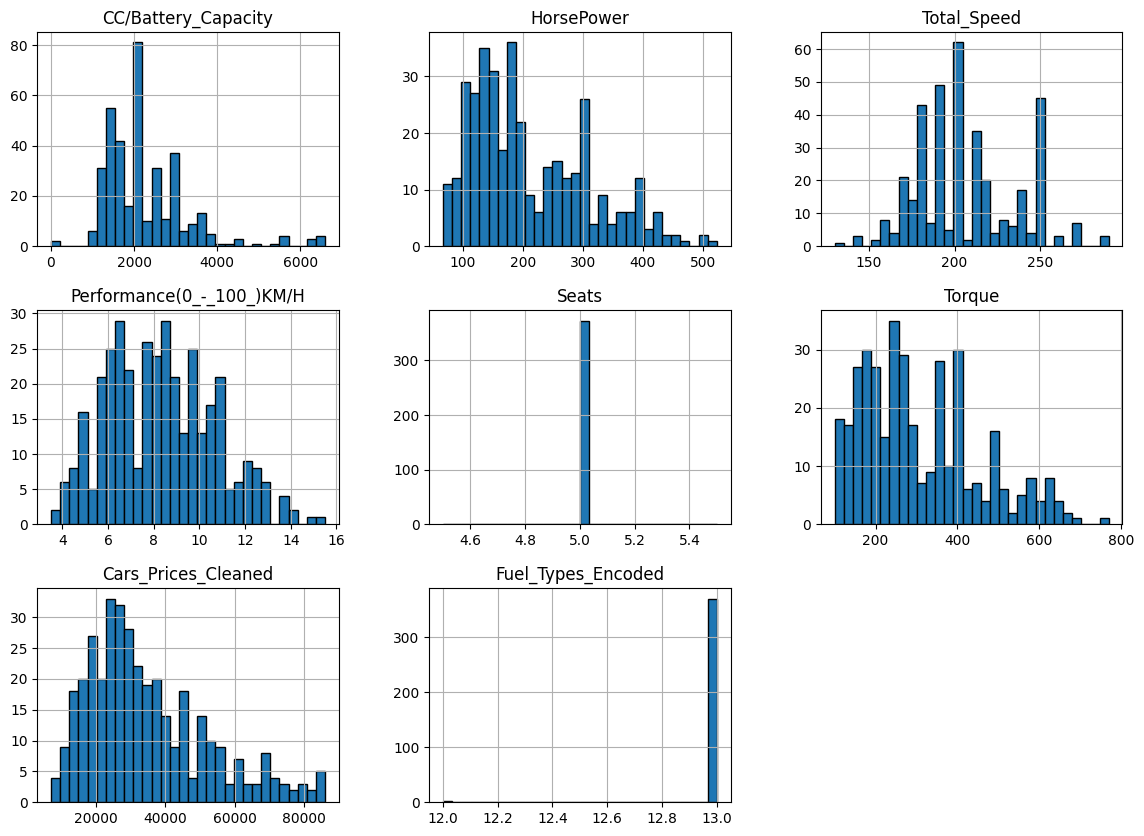

In [98]:
df.hist(figsize=(14,10), bins=30, edgecolor='black')
plt.show()

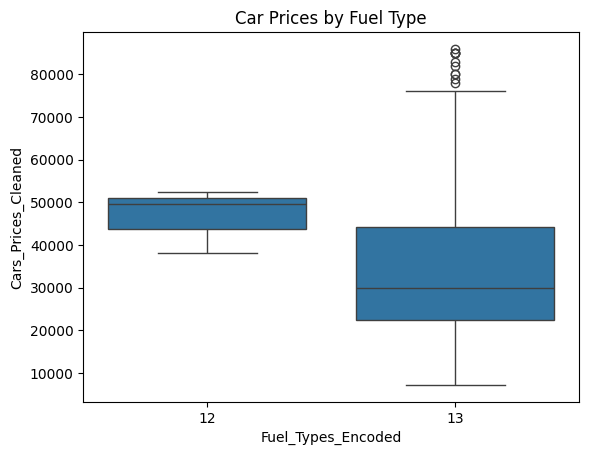

In [99]:
sns.boxplot(x='Fuel_Types_Encoded', y='Cars_Prices_Cleaned', data=df)
plt.title("Car Prices by Fuel Type")
plt.show()

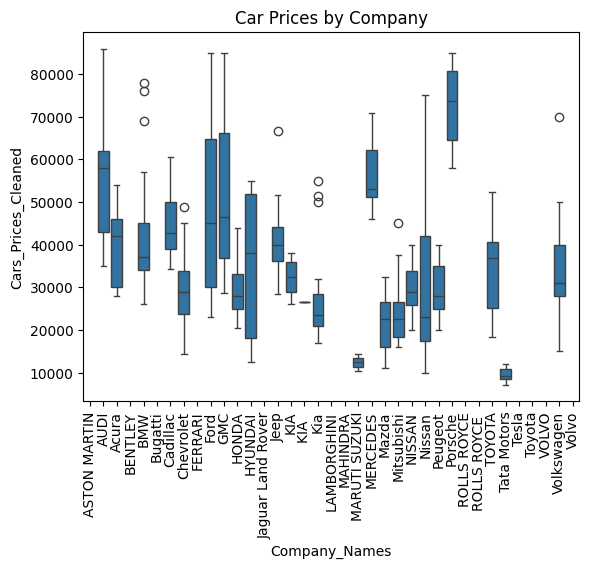

In [100]:
sns.boxplot(x='Company_Names', y='Cars_Prices_Cleaned', data=df)
plt.xticks(rotation=90)
plt.title("Car Prices by Company")
plt.show()

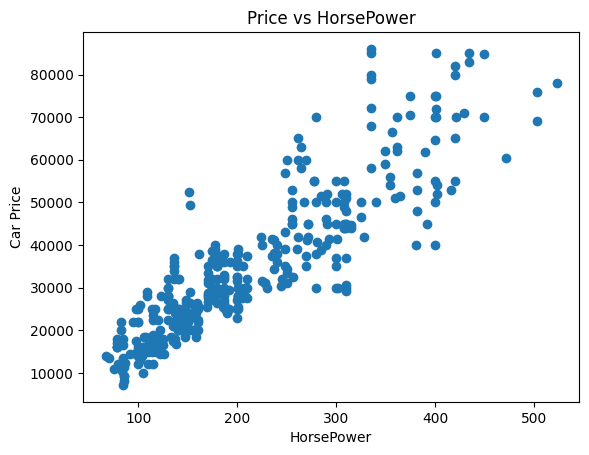

In [101]:
plt.scatter(df['HorsePower'], df['Cars_Prices_Cleaned'])
plt.xlabel("HorsePower")
plt.ylabel("Car Price")
plt.title("Price vs HorsePower")
plt.show()

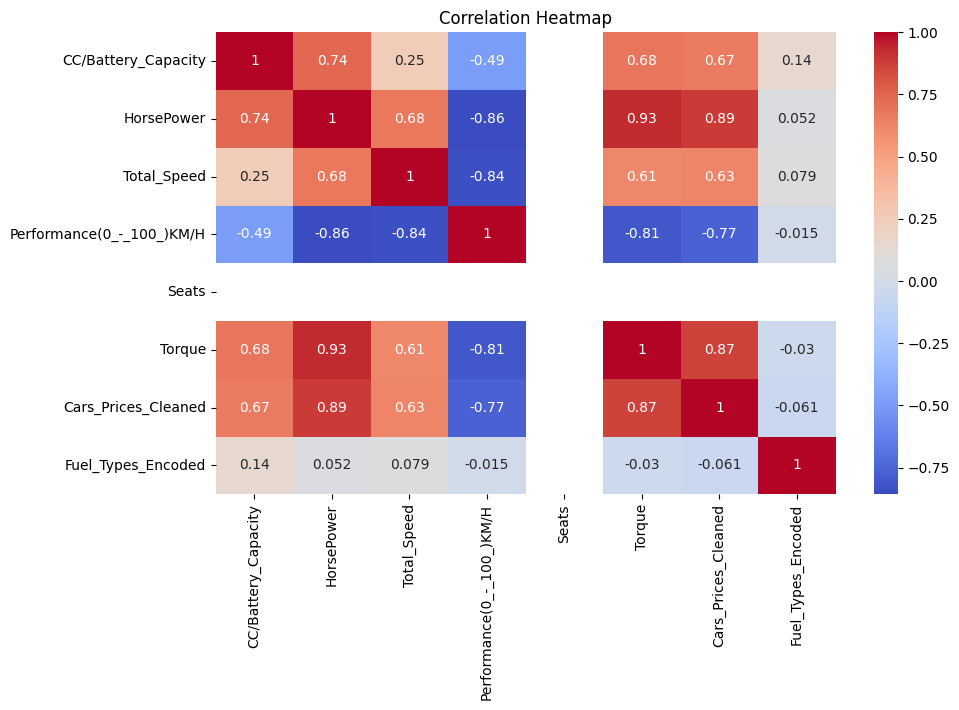

In [102]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

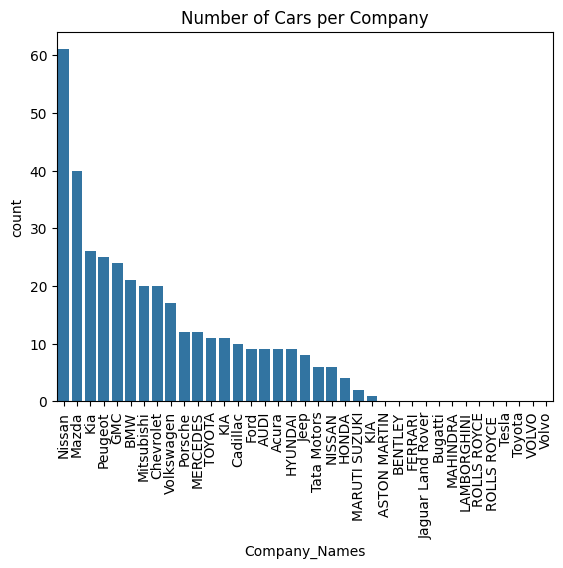

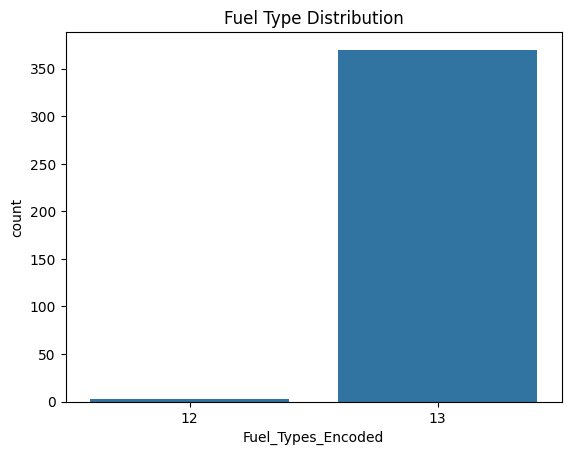

In [103]:
sns.countplot(x='Company_Names', data=df, order=df['Company_Names'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Cars per Company")
plt.show()

sns.countplot(x='Fuel_Types_Encoded', data=df)
plt.title("Fuel Type Distribution")
plt.show()

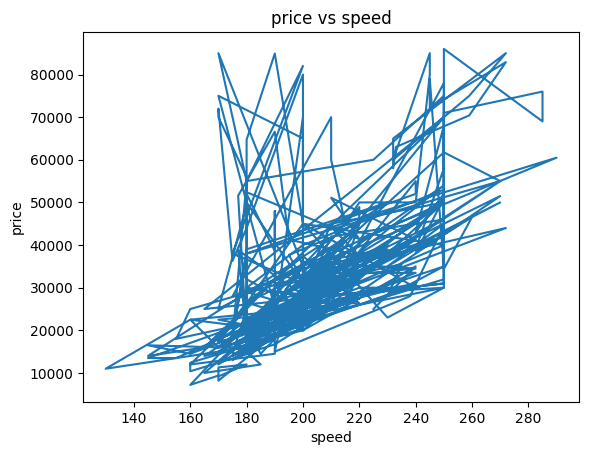

In [104]:
plt.plot(df['Total_Speed'], df['Cars_Prices_Cleaned'])
plt.title("price vs speed")
plt.ylabel("price")
plt.xlabel("speed")
plt.show()

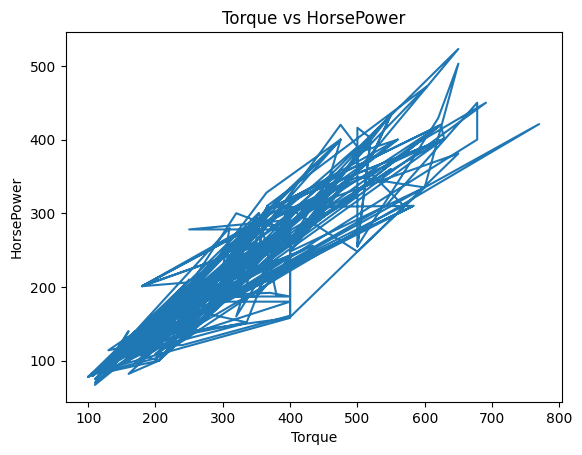

In [105]:
plt.plot(df['Torque'], df['HorsePower'])
plt.title("Torque vs HorsePower")
plt.ylabel("HorsePower")
plt.xlabel("Torque")
plt.show()

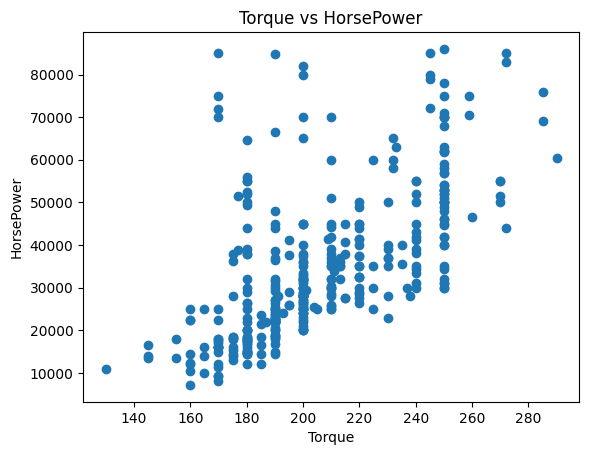

In [106]:
plt.scatter(df['Total_Speed'], df['Cars_Prices_Cleaned'])
plt.title("Torque vs HorsePower")
plt.ylabel("HorsePower")
plt.xlabel("Torque")
plt.show()